# QUESTION 2 - Logistic Regression

# STEP 1: OBTAINING DATA

In [1]:
import pandas as pd
import numpy as np
import math

grid_df = pd.read_csv("dataset.csv")
print(grid_df)

grid_df_arr = np.array(grid_df)
print(grid_df_arr)
print(grid_df_arr.shape)

           tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3      

In [2]:
def splitData(data, train_size_ratio, val_size_ratio, test_size_ratio):
    data_arr = np.array(data)
    
    number_of_instances = len(data_arr)
    
    data_arr_x = data_arr[:,:-1]
    data_arr_y = data_arr[:,-1]
    
    train_size = int(number_of_instances * train_size_ratio)
    val_size = int(number_of_instances * val_size_ratio)
    test_size = int(number_of_instances * test_size_ratio)
    
    train_x = data_arr_x[:train_size]
    train_y = data_arr_y[:train_size]
    
    val_x = data_arr_x[train_size: train_size + val_size]
    val_y = data_arr_y[train_size: train_size + val_size]
    
    test_x = data_arr_x[train_size + val_size:]
    test_y = data_arr_y[train_size + val_size:]
    
    print(len(train_x), len(train_y) )
    print(len(val_x), len(val_y) )
    print(len(test_x), len(test_y) )
    
    return train_x, train_y.astype(int), val_x, val_y.astype(int), test_x, test_y.astype(int)
    
    

In [3]:
def normalizeData(data_arr, min_val, max_val):
    normalized_data = (data_arr - min_val) / (max_val - min_val)
    return normalized_data
    

In [4]:
train_x, train_y, val_x, val_y, test_x, test_y = splitData(grid_df, 0.7, 0.1, 0.2)

max_val = train_x.max()
min_val = train_x.min()

# WE NEED TO NORMALIZE DATA TO PREVENT FEATURE SCALE DIFFERENCE EFFECT
train_x = normalizeData(train_x, min_val, max_val)
val_x = normalizeData(val_x, min_val, max_val)
test_x = normalizeData(test_x, min_val, max_val)

42000 42000
6000 6000
12000 12000


# Implementing the Logistic Regression Classifier

In [5]:
# data_x = (num, 12)
# w = w1, w2, w3, w4....
# bias = w0
# return 0 or 1
class LogisticRegressionClassifier:
    def __init__(self, learning_rate, batch_size):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        #self.number_epoch = number_epoch
        self.w = None
        self.bias = None
        
    def MCLE(self, data_x, w, bias):
        sumTerm = np.dot(data_x, w) + bias
        return 1 / (1 + np.exp(sumTerm)) 
    
    def init_w_Zeros(self, num):
        x = np.zeros(num)
        self.w, self.bias = x[1:], x[0]
    
    def init_w_Gaussian(self, mean, standard_dev, num):
        x = np.random.normal( loc = mean, scale = standard_dev, size = num )
        self.w, self.bias = x[1:], x[0]
        
    def init_w_Uniform(self, num):
        x = np.random.uniform(size = num)
        self.w, self.bias = x[1:], x[0]
        
    def fit(self, train_x, train_y):
        # implementing the UPDATE RULE for any given batch size
        number_samples, number_features = train_x.shape
        i = 0
        while i < number_samples:
            train_x_slice = train_x[i: self.batch_size + i] # one row = one sample
            train_y_slice = train_y[i: self.batch_size + i]
            i = i + self.batch_size 
            
            y_predicted = self.MCLE(train_x_slice, self.w, self.bias)
            y_predicted_label1 = 1 - y_predicted
            y_real_y_predicted_diff = train_y_slice - y_predicted_label1
            
            gradient = np.dot(train_x_slice.T, y_real_y_predicted_diff)
            self.w = self.w + self.learning_rate * gradient
            
            g = np.sum(y_real_y_predicted_diff)
            self.bias = self.bias + self.learning_rate * g
        
    def predict(self, test_x):
        model_results = self.MCLE(test_x, self.w, self.bias)
        y_predicted = [0 if i > 0.5 else 1 for i in model_results]
        return y_predicted
        
    def confusionMatrix(self, data_x, data_y):
        predictions = self.predict(data_x)
        labelVarNum = np.unique(data_y).size # number of class variations
        confusionMatrix = np.zeros(shape=(labelVarNum, labelVarNum))
        for pred, exp in zip(predictions, data_y):
            confusionMatrix[pred][exp] += 1   
        return confusionMatrix
        
        

In [6]:
def accuracyResults(validLabels, validPredictedLabels): 
    numTrue = 0
    for gtL, predL in zip(validLabels, validPredictedLabels):
        if gtL == predL: 
            numTrue += 1
    #numFalse = validLabels.size - numTrue
    #print("The number of correct predictions are", numTrue)
    #print("The number of incorrect predictions are", numFalse)
    accuracy = (numTrue/len(validLabels))
    return accuracy

# Q 2.1: Experimenting with different gradient ascent techniques

# Experiment with Stochastic

In [7]:
# CREATING THE REGRESSORs
number_samples, number_features = train_x.shape
total_w = number_features + 1

learning_rate = 0.001
batch_size= 1

# stochastic gradient ascent (batch size= 1)
LRC1 = LogisticRegressionClassifier(learning_rate, batch_size)
LRC1.init_w_Gaussian(0, 1, total_w)

accuracy_array_stochastic = []
# Make experiment within 100 epoch
for i in range(100):
    # stochastic gradient ascent (batch size= 1)
    LRC1.fit(train_x, train_y)
    pred = LRC1.predict(val_x)
    accuracy_array_stochastic.append(accuracyResults(val_y, pred))

print(accuracy_array_stochastic)

[0.6478333333333334, 0.665, 0.6938333333333333, 0.7165, 0.726, 0.7308333333333333, 0.7323333333333333, 0.7321666666666666, 0.7325, 0.7343333333333333, 0.7341666666666666, 0.734, 0.7341666666666666, 0.7351666666666666, 0.7351666666666666, 0.7351666666666666, 0.7356666666666667, 0.7355, 0.7356666666666667, 0.736, 0.737, 0.7373333333333333, 0.7383333333333333, 0.7383333333333333, 0.739, 0.7393333333333333, 0.7398333333333333, 0.74, 0.7405, 0.7416666666666667, 0.742, 0.7431666666666666, 0.7435, 0.7438333333333333, 0.7443333333333333, 0.745, 0.745, 0.7455, 0.746, 0.7463333333333333, 0.7466666666666667, 0.7471666666666666, 0.7478333333333333, 0.7486666666666667, 0.7495, 0.75, 0.7505, 0.7506666666666667, 0.7513333333333333, 0.7518333333333334, 0.7516666666666667, 0.7523333333333333, 0.7526666666666667, 0.7528333333333334, 0.7533333333333333, 0.7538333333333334, 0.7543333333333333, 0.7551666666666667, 0.7553333333333333, 0.7555, 0.7565, 0.7566666666666667, 0.7568333333333334, 0.757166666666666

# Experiment with Mini Batch

In [8]:
# mini-batch gradient ascent (batch size= 64)
learning_rate = 0.001
batch_size = 64

LRC2 = LogisticRegressionClassifier(learning_rate, batch_size)
LRC2.init_w_Gaussian(0, 1, total_w)

accuracy_array_batch_64 = []
# Make experiment within 100 epoch
for i in range(100):
    # mini-batch gradient ascent (batch size= 64)
    LRC2.fit( train_x, train_y)
    pred = LRC2.predict(val_x)
    accuracy_array_batch_64.append(accuracyResults(val_y, pred))
    
print(accuracy_array_batch_64)    


[0.6565, 0.6841666666666667, 0.7013333333333334, 0.7121666666666666, 0.7155, 0.7193333333333334, 0.7215, 0.7246666666666667, 0.7266666666666667, 0.7266666666666667, 0.7268333333333333, 0.727, 0.7276666666666667, 0.7273333333333334, 0.7281666666666666, 0.7291666666666666, 0.73, 0.7303333333333333, 0.7315, 0.7316666666666667, 0.732, 0.733, 0.7331666666666666, 0.7333333333333333, 0.7345, 0.735, 0.7351666666666666, 0.736, 0.7366666666666667, 0.7373333333333333, 0.738, 0.739, 0.7396666666666667, 0.7401666666666666, 0.7406666666666667, 0.7411666666666666, 0.7416666666666667, 0.7421666666666666, 0.7425, 0.743, 0.7431666666666666, 0.7436666666666667, 0.744, 0.7445, 0.7443333333333333, 0.745, 0.7451666666666666, 0.7453333333333333, 0.746, 0.7461666666666666, 0.7463333333333333, 0.7466666666666667, 0.747, 0.7475, 0.7478333333333333, 0.7485, 0.7485, 0.7485, 0.749, 0.7491666666666666, 0.7498333333333334, 0.7501666666666666, 0.7506666666666667, 0.7515, 0.7516666666666667, 0.752, 0.7525, 0.7525, 0.7









# Experiment with Full Batch

In [9]:
# full-batch gradient ascent (batch size= number_samples)
learning_rate = 0.001
batch_size = number_samples

LRC3 = LogisticRegressionClassifier(learning_rate, batch_size)
LRC3.init_w_Gaussian(0, 1, total_w)

accuracy_array_batch_full = []
# Make experiment within 100 epoch
for i in range(100):
    # full-batch gradient ascent (batch size= number_samples)
    LRC3.fit( train_x, train_y)
    pred = LRC3.predict(val_x)
    accuracy_array_batch_full.append(accuracyResults(val_y, pred))
    
print(accuracy_array_batch_full)

[0.641, 0.359, 0.641, 0.641, 0.359, 0.641, 0.6448333333333334, 0.359, 0.641, 0.6493333333333333, 0.359, 0.641, 0.657, 0.359, 0.641, 0.6571666666666667, 0.359, 0.641, 0.6608333333333334, 0.359, 0.641, 0.6615, 0.359, 0.641, 0.6625, 0.359, 0.641, 0.6628333333333334, 0.359, 0.641, 0.663, 0.359, 0.641, 0.6636666666666666, 0.359, 0.641, 0.6643333333333333, 0.3591666666666667, 0.641, 0.6653333333333333, 0.3616666666666667, 0.641, 0.6673333333333333, 0.3705, 0.641, 0.672, 0.3835, 0.641, 0.6845, 0.4048333333333333, 0.641, 0.6948333333333333, 0.42883333333333334, 0.641, 0.7115, 0.47683333333333333, 0.641, 0.7286666666666667, 0.6146666666666667, 0.6501666666666667, 0.5356666666666666, 0.6421666666666667, 0.7103333333333334, 0.7206666666666667, 0.5098333333333334, 0.6415, 0.7323333333333333, 0.723, 0.7313333333333333, 0.6531666666666667, 0.6615, 0.4498333333333333, 0.641, 0.7253333333333334, 0.5281666666666667, 0.6418333333333334, 0.721, 0.7308333333333333, 0.6265, 0.6533333333333333, 0.507, 0.641

According to experiment results, I observed that batch size affected training time as I checked from Jupyter Lab. <br>
More frequent updates mean more expensive computation, more slow to execute <br>
Therefore stochastic is the slowest among all, following mini batch and full batch in terms of exec. time<br>
As in an example run: <br>
    *Experimenting with batch size = 1 took 69s to execute on my machine <br>
    *Experimenting with batch size = 64 took 3s to execute on my machine<br>
    *Experimenting with batch size = 42000 took less th. 1s to execute on my machine<br>

# Plotting graph for batch size experiment results

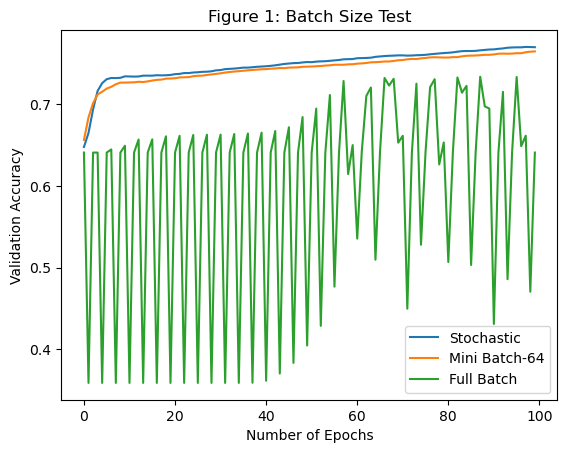

In [10]:
import matplotlib.pyplot as plt

x_axis = []
for i in range(100):
  x_axis.append(i)  

plt.plot(x_axis, accuracy_array_stochastic, label = "Stochastic")
plt.plot(x_axis, accuracy_array_batch_64, label = "Mini Batch-64")
plt.plot(x_axis, accuracy_array_batch_full, label = "Full Batch")  

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Figure 1: Batch Size Test')
plt.legend()
plt.show()

At the end of 100 epochs, the best validation accuracy belongs to stochastic & mini batch technique! (very close)<br>
Here is the confusion matrix of it below: <br>

In [11]:
pred = LRC1.predict(val_x)
print(accuracyResults(val_y, pred))
LRC1.confusionMatrix(val_x, val_y)


0.77


array([[3347.,  881.],
       [ 499., 1273.]])

# Q 2.2: Experimenting with different initilization techniques

# Experiment with gaussian distribution

In [12]:
# CREATING THE REGRESSORs
number_samples, number_features = train_x.shape
total_w = number_features + 1

learning_rate = 0.001
batch_size = 64
# Gauss init.
LRC_gauss = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_gauss.init_w_Gaussian(0, 1, total_w)

accuracy_array_gauss = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_gauss.fit(train_x, train_y)
    pred = LRC_gauss.predict(val_x)
    accuracy_array_gauss.append(accuracyResults(val_y, pred))

print(accuracy_array_gauss)

[0.648, 0.6678333333333333, 0.6991666666666667, 0.7166666666666667, 0.7286666666666667, 0.7311666666666666, 0.7338333333333333, 0.7341666666666666, 0.7343333333333333, 0.7346666666666667, 0.7346666666666667, 0.7355, 0.7358333333333333, 0.7358333333333333, 0.7361666666666666, 0.7376666666666667, 0.7383333333333333, 0.7391666666666666, 0.7401666666666666, 0.7405, 0.7406666666666667, 0.741, 0.7413333333333333, 0.7421666666666666, 0.7421666666666666, 0.7431666666666666, 0.7435, 0.7441666666666666, 0.7453333333333333, 0.7458333333333333, 0.7468333333333333, 0.7478333333333333, 0.748, 0.7485, 0.7485, 0.7486666666666667, 0.7491666666666666, 0.7493333333333333, 0.7493333333333333, 0.7493333333333333, 0.7496666666666667, 0.751, 0.7518333333333334, 0.752, 0.7523333333333333, 0.7526666666666667, 0.7533333333333333, 0.7535, 0.7535, 0.7541666666666667, 0.7543333333333333, 0.7548333333333334, 0.7553333333333333, 0.7553333333333333, 0.756, 0.7563333333333333, 0.7568333333333334, 0.7568333333333334, 0

# Experiment with uniform distribution

In [13]:
# Uniform init.
learning_rate = 0.001
batch_size = 64

LRC_uniform = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_uniform.init_w_Uniform(total_w)

accuracy_array_uniform = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_uniform.fit(train_x, train_y)
    pred = LRC_uniform.predict(val_x)
    accuracy_array_uniform.append(accuracyResults(val_y, pred))

print(accuracy_array_uniform)

[0.6471666666666667, 0.6828333333333333, 0.703, 0.7203333333333334, 0.7283333333333334, 0.7295, 0.7316666666666667, 0.7315, 0.7295, 0.7296666666666667, 0.7321666666666666, 0.7323333333333333, 0.7341666666666666, 0.7361666666666666, 0.7355, 0.7355, 0.736, 0.7366666666666667, 0.7368333333333333, 0.7375, 0.7385, 0.7386666666666667, 0.7388333333333333, 0.739, 0.7395, 0.7411666666666666, 0.7418333333333333, 0.7416666666666667, 0.7423333333333333, 0.7426666666666667, 0.7435, 0.744, 0.745, 0.7456666666666667, 0.7456666666666667, 0.7461666666666666, 0.7461666666666666, 0.7466666666666667, 0.7466666666666667, 0.7471666666666666, 0.7473333333333333, 0.7473333333333333, 0.7478333333333333, 0.7478333333333333, 0.7478333333333333, 0.7483333333333333, 0.7483333333333333, 0.7486666666666667, 0.7493333333333333, 0.7498333333333334, 0.7498333333333334, 0.75, 0.7506666666666667, 0.7516666666666667, 0.7516666666666667, 0.7518333333333334, 0.7523333333333333, 0.7523333333333333, 0.7536666666666667, 0.754,

# Experiment with zero distribution

In [14]:
# Zero init.
learning_rate = 0.001
batch_size = 64

LRC_zero = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_zero.init_w_Zeros(total_w)

accuracy_array_zero = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_zero.fit(train_x, train_y)
    pred = LRC_zero.predict(val_x)
    accuracy_array_zero.append(accuracyResults(val_y, pred))

print(accuracy_array_zero)

[0.6456666666666667, 0.6831666666666667, 0.7066666666666667, 0.7201666666666666, 0.7303333333333333, 0.732, 0.7338333333333333, 0.7335, 0.7318333333333333, 0.7325, 0.7328333333333333, 0.7335, 0.7345, 0.7356666666666667, 0.7356666666666667, 0.7366666666666667, 0.737, 0.7378333333333333, 0.738, 0.7393333333333333, 0.7395, 0.74, 0.7395, 0.74, 0.741, 0.7415, 0.7423333333333333, 0.743, 0.7431666666666666, 0.7433333333333333, 0.7436666666666667, 0.7443333333333333, 0.7448333333333333, 0.7446666666666667, 0.745, 0.7455, 0.7466666666666667, 0.7468333333333333, 0.7468333333333333, 0.7473333333333333, 0.7476666666666667, 0.7478333333333333, 0.748, 0.7481666666666666, 0.7486666666666667, 0.749, 0.7496666666666667, 0.75, 0.7498333333333334, 0.75, 0.7505, 0.7511666666666666, 0.7516666666666667, 0.7513333333333333, 0.7523333333333333, 0.7526666666666667, 0.7533333333333333, 0.7533333333333333, 0.754, 0.7546666666666667, 0.7553333333333333, 0.7556666666666667, 0.7565, 0.7571666666666667, 0.7571666666

# Plotting graph for init. techniques experiment results

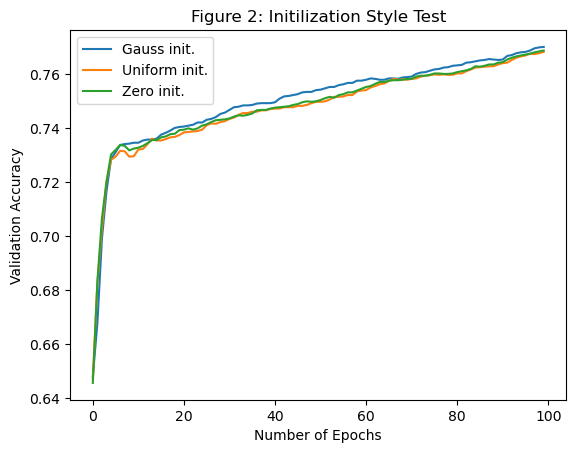

In [15]:
x_axis = []
for i in range(100):
  x_axis.append(i)  

plt.plot(x_axis, accuracy_array_gauss, label = "Gauss init.")
plt.plot(x_axis, accuracy_array_uniform, label = "Uniform init.")
plt.plot(x_axis, accuracy_array_zero, label = "Zero init.")  

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Figure 2: Initilization Style Test')
plt.legend()
plt.show()

Apparently, the results suggest that initialization technique did not make a huge difference on the model accuracy.
Still, according to the graph, Gauss is most stable<br>
Here is the confusion matrix of it below: <br>

In [16]:
pred = LRC_gauss.predict(val_x)
print(accuracyResults(val_y, pred))
LRC_gauss.confusionMatrix(val_x, val_y)

0.7701666666666667


array([[3351.,  884.],
       [ 495., 1270.]])

# Q 2.3: Experimenting with different learning rate values

# Experiment with learning rate 1

In [17]:
# CREATING THE REGRESSORs
number_samples, number_features = train_x.shape
total_w = number_features + 1

# Lr = 1 init.
learning_rate = 1
LRC_lr_1 = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_lr_1.init_w_Gaussian(0, 1, total_w)

accuracy_array_lr_1 = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_lr_1.fit(train_x, train_y)
    pred = LRC_lr_1.predict(val_x)
    accuracy_array_lr_1.append(accuracyResults(val_y, pred))

print(accuracy_array_lr_1)

[0.7456666666666667, 0.7035, 0.723, 0.7633333333333333, 0.7718333333333334, 0.7563333333333333, 0.7536666666666667, 0.7453333333333333, 0.7381666666666666, 0.7315, 0.7305, 0.7225, 0.719, 0.7111666666666666, 0.7091666666666666, 0.709, 0.7148333333333333, 0.7053333333333334, 0.7111666666666666, 0.7113333333333334, 0.7006666666666667, 0.7038333333333333, 0.7046666666666667, 0.7055, 0.7051666666666667, 0.7068333333333333, 0.702, 0.7085, 0.7193333333333334, 0.708, 0.7171666666666666, 0.6955, 0.702, 0.701, 0.697, 0.7273333333333334, 0.7158333333333333, 0.7013333333333334, 0.7068333333333333, 0.6948333333333333, 0.7028333333333333, 0.701, 0.6988333333333333, 0.7028333333333333, 0.7036666666666667, 0.7076666666666667, 0.706, 0.7156666666666667, 0.7035, 0.7008333333333333, 0.6941666666666667, 0.7178333333333333, 0.7156666666666667, 0.7093333333333334, 0.7288333333333333, 0.7023333333333334, 0.721, 0.7088333333333333, 0.7313333333333333, 0.7031666666666667, 0.7118333333333333, 0.703, 0.702833333

# Experiment with learning rate 10^-3

In [18]:
# Lr = 0.001 init.
learning_rate = 0.001
LRC_lr_10expminus3 = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_lr_10expminus3.init_w_Gaussian(0, 1, total_w)

accuracy_array_lr_10expminus3 = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_lr_10expminus3.fit(train_x, train_y)
    pred = LRC_lr_10expminus3.predict(val_x)
    accuracy_array_lr_10expminus3.append(accuracyResults(val_y, pred))

print(accuracy_array_lr_10expminus3)

[0.6491666666666667, 0.6755, 0.7013333333333334, 0.7175, 0.7263333333333334, 0.7303333333333333, 0.7318333333333333, 0.7326666666666667, 0.7326666666666667, 0.7333333333333333, 0.734, 0.7346666666666667, 0.735, 0.7355, 0.7365, 0.7375, 0.738, 0.7386666666666667, 0.7393333333333333, 0.7401666666666666, 0.7403333333333333, 0.7406666666666667, 0.741, 0.7425, 0.7426666666666667, 0.7436666666666667, 0.7438333333333333, 0.7441666666666666, 0.7446666666666667, 0.7455, 0.7458333333333333, 0.7463333333333333, 0.7468333333333333, 0.7471666666666666, 0.7481666666666666, 0.7483333333333333, 0.7485, 0.7486666666666667, 0.749, 0.7495, 0.7496666666666667, 0.7498333333333334, 0.75, 0.7503333333333333, 0.7508333333333334, 0.751, 0.751, 0.7515, 0.7525, 0.7528333333333334, 0.7531666666666667, 0.7536666666666667, 0.7538333333333334, 0.7538333333333334, 0.7545, 0.7548333333333334, 0.7548333333333334, 0.7561666666666667, 0.757, 0.757, 0.7573333333333333, 0.7568333333333334, 0.7576666666666667, 0.757833333333

# Experiment with learning rate 10^-4

In [19]:
# Lr = 0.0001 init.
learning_rate = 0.0001
LRC_lr_10expminus4 = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_lr_10expminus4.init_w_Gaussian(0, 1, total_w)

accuracy_array_lr_10expminus4 = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_lr_10expminus4.fit(train_x, train_y)
    pred = LRC_lr_10expminus4.predict(val_x)
    accuracy_array_lr_10expminus4.append(accuracyResults(val_y, pred))

print(accuracy_array_lr_10expminus4)

[0.6546666666666666, 0.6503333333333333, 0.65, 0.6506666666666666, 0.6516666666666666, 0.6541666666666667, 0.6568333333333334, 0.6606666666666666, 0.662, 0.6648333333333334, 0.6663333333333333, 0.6698333333333333, 0.6718333333333333, 0.6766666666666666, 0.6791666666666667, 0.683, 0.6843333333333333, 0.687, 0.6906666666666667, 0.693, 0.6948333333333333, 0.6976666666666667, 0.6996666666666667, 0.7003333333333334, 0.703, 0.7041666666666667, 0.7066666666666667, 0.7075, 0.709, 0.7111666666666666, 0.7126666666666667, 0.7133333333333334, 0.7136666666666667, 0.7151666666666666, 0.717, 0.7191666666666666, 0.719, 0.721, 0.7216666666666667, 0.7233333333333334, 0.7235, 0.7245, 0.726, 0.727, 0.7261666666666666, 0.727, 0.728, 0.7291666666666666, 0.7293333333333333, 0.7296666666666667, 0.7296666666666667, 0.7303333333333333, 0.7318333333333333, 0.7321666666666666, 0.7331666666666666, 0.7335, 0.7331666666666666, 0.7338333333333333, 0.7335, 0.7335, 0.7336666666666667, 0.7336666666666667, 0.733333333333

# Experiment with learning rate 10^-5

In [20]:
# Lr = 0.00001 init.
learning_rate = 0.00001
LRC_lr_10expminus5 = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_lr_10expminus5.init_w_Gaussian(0, 1, total_w)

accuracy_array_lr_10expminus5 = []
# Make experiment within 100 epoch
for i in range(100):
    LRC_lr_10expminus5.fit(train_x, train_y)
    pred = LRC_lr_10expminus5.predict(val_x)
    accuracy_array_lr_10expminus5.append(accuracyResults(val_y, pred))

print(accuracy_array_lr_10expminus5)

[0.49733333333333335, 0.6266666666666667, 0.6675, 0.666, 0.6586666666666666, 0.6521666666666667, 0.6493333333333333, 0.6456666666666667, 0.6448333333333334, 0.6443333333333333, 0.6436666666666667, 0.6433333333333333, 0.6428333333333334, 0.6428333333333334, 0.6426666666666667, 0.6426666666666667, 0.6426666666666667, 0.6426666666666667, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.643, 0.643, 0.643, 0.643, 0.6426666666666667, 0.6426666666666667, 0.6425, 0.6425, 0.6425, 0.6425, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.6428333333333334, 0.643, 0.6433333333333333, 0.6433333333333333, 0.6435, 0.6436666666666667, 0.644, 0.6438333333333334, 0.644, 0.6441666666666667, 0.6443333333333333, 0.6445, 0.6446666666666667, 0.6446666666666667, 0.645, 0.6456666666666667, 0.6458333333333334, 0.646, 0.646, 0.6463333333333333, 0.6465, 0.647, 0.6473333333333333, 0.6478333333333334, 0.6478333333333334, 0.648, 0.6

# Plotting graph for diff. learning rates experiment results

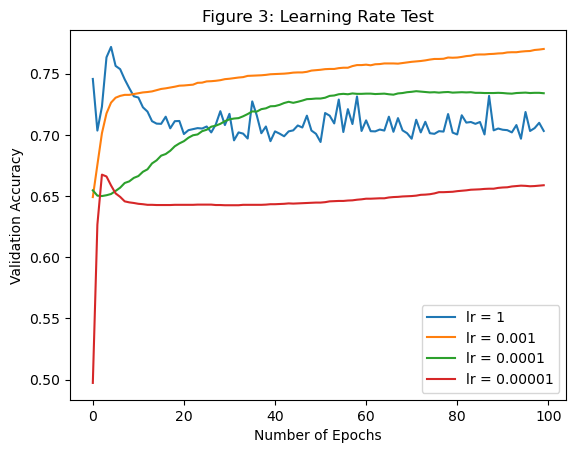

In [21]:
x_axis = []
for i in range(100):
  x_axis.append(i)  

plt.plot(x_axis, accuracy_array_lr_1, label = "lr = 1")
plt.plot(x_axis, accuracy_array_lr_10expminus3, label = "lr = 0.001")
plt.plot(x_axis, accuracy_array_lr_10expminus4, label = "lr = 0.0001")  
plt.plot(x_axis, accuracy_array_lr_10expminus5, label = "lr = 0.00001") 



plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Figure 3: Learning Rate Test')
plt.legend()
plt.show()

Learning rate is about how rapidly we should make update for our weights. <br>
When learning rate is too large, overshooting on the optimal value may occur <br>
When learning rate is too small, the number of iterations (epochs) needed to get close to optimal value will increase. <br>
In a constant epoch number (100) case as in our example, learning rate should be selected in such a way that: <br>
    * It must not be too large for overshooting <br>
    * It must not be very small so that it cannot converge to optimal value in given 100 iteration time <br>
<br>    
Accordingly, the results show that: <br>
    Largest learning rate oscillates and cannot succesfully converge to our data results, <br>
    smallest learning rate is incapable of getting close to converge during the given epoch time <br>
    In this case 0.001 comes out the most optimal selection choice for our data! <br>

Here is the confusion matrix of it below: <br>
    

In [22]:
pred = LRC_lr_10expminus3.predict(val_x)
print(accuracyResults(val_y, pred))
LRC_lr_10expminus3.confusionMatrix(val_x, val_y)

0.7701666666666667


array([[3348.,  881.],
       [ 498., 1273.]])

# OPTIMAL MODEL IS CONSTRUCTED WITH: <br>
<br>
BATCH SIZE = 64 (Mini batch is selected over stochastic because the results were very close, mini was much faster) <br>
INIT = GAUSS INIT (All were very close actually - Most stable progress on graph)<br>
LEARNING RATE = 0.001 (Definately the best among others!)<br>

# Q 2.4: Building the optimal model

In [23]:
# CREATING THE REGRESSOR
number_samples, number_features = train_x.shape
total_w = number_features + 1

# Init with: stochastic, uniform dist, lr = 0.001
batch_size = 64
learning_rate = 0.001

LRC_optimal = LogisticRegressionClassifier(learning_rate, batch_size= 64)
LRC_optimal.init_w_Gaussian(0, 1, total_w)

for i in range(100):
    LRC_optimal.fit(train_x, train_y)
    
pred = LRC_optimal.predict(test_x)


conf_mat = LRC_optimal.confusionMatrix(test_x, test_y)
print("Confusion matrix is: \n", conf_mat )
print("Accuracy is: %", accuracyResults(test_y, pred)*100)


precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])
f1_score = ((1 + pow(1, 2)) * precision * recall)/((pow(1,2) * precision) + recall)
f2_score = ((1 + pow(2, 2)) * precision * recall)/((pow(2,2) * precision) + recall)
f05_score = ((1 + pow(1, 0.5)) * precision * recall)/((pow(1,0.5) * precision) + recall)
fp_rate = conf_mat[0][1] / (conf_mat[0][1] + conf_mat[1][1])

print("Precision is: %", precision)
print("Recall is: %", recall)
print("F1 Score is: %", f1_score)
print("F2 Score is: %", f2_score)
print("F0.5 Score is: %", f05_score)
print("FP Rate is: %", fp_rate)




Confusion matrix is: 
 [[6652. 1841.]
 [ 999. 2508.]]
Accuracy is: % 76.33333333333333
Precision is: % 0.7832332509125162
Recall is: % 0.8694288328323095
F1 Score is: % 0.8240832507433103
F2 Score is: % 0.8507046576463667
F0.5 Score is: % 0.8240832507433103
FP Rate is: % 0.42331570475971486


In our case, to evaluate the overall performance of the model in regard to calculated metrics, we can say that: <br>
*First of all accuracy is important, but it may have limitations when class distributions are not balanced!  <br>
<br>
*As our task is to detect unstable grids we would desire to have higher recall,<br>
 the reason to that is important thing being able to classify as many positives as possible to not miss any postive <br>
 this is a tradeoff of precision, but falsely predicting a sample as unstable is less risky than missing an unstable one <br>
 <br>
*F2 score is more important in this regard as Beta > 1 favors recall!<br>
<br>
*Relative importance of detecting positives and negatives are not same, because as mentioned above<br>
detecting positive class that is grid being unstable is important and risky whereas we can tolerate misclassifying<br> 
some stable grids as unstable, false positive.<br>
It would increase the cost to check them again of course, but that is far better than the risk of non detected unstable grid!<br>
 



In [24]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
for i in range(100):
    logisticRegr.fit(train_x, train_y)
predictions = logisticRegr.predict(test_x)
score = logisticRegr.score(test_x, test_y)
print(score*100)



80.575


# CLOSE ENOUGH!!!!!